In [1]:
%cd ../..
!pwd

/workspaces/freq-net
/workspaces/freq-net


In [2]:
from freq_net.data_loader.data_loaders import DIV2KDataset, DIV2KDataLoader

/opt/conda/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/opt/conda/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Check dataset

In [13]:
ds = DIV2KDataset()
dl = DIV2KDataLoader(1, num_workers=0, shuffle=False)
print(next(iter(ds))[0])
print(next(iter(dl))[0][0].shape)
print(next(iter(dl))[0][1].shape)

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=510x351 at 0x7F1BD80D9780>
torch.Size([1, 3, 512, 512])
torch.Size([1, 1, 16, 16, 32, 32])


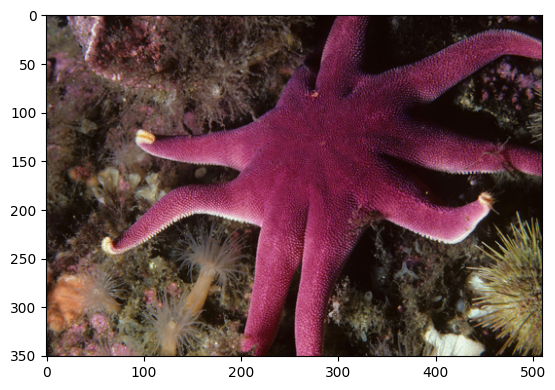

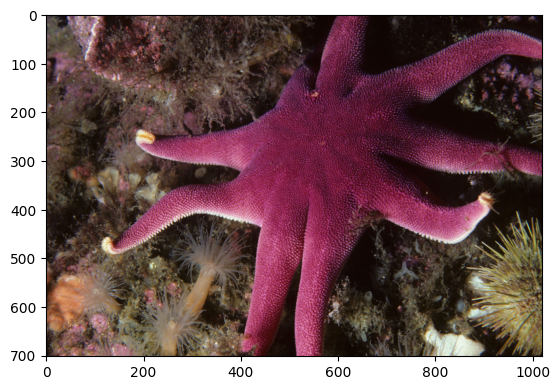

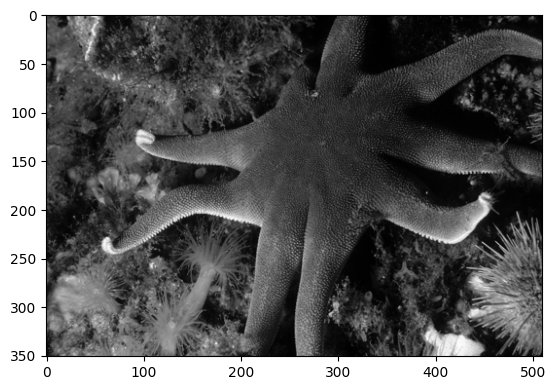

In [14]:
d = next(iter(ds))
plt.imshow(d[0], cmap='gray')
plt.show()
plt.imshow(d[1], cmap='gray')
plt.show()
plt.imshow(np.array(d[0].convert('YCbCr'))[:,:,0], cmap='gray')
plt.show()

## Check dataloader

In [15]:
d = next(iter(dl))

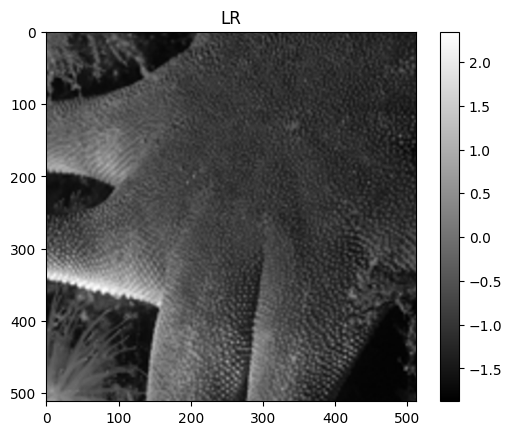

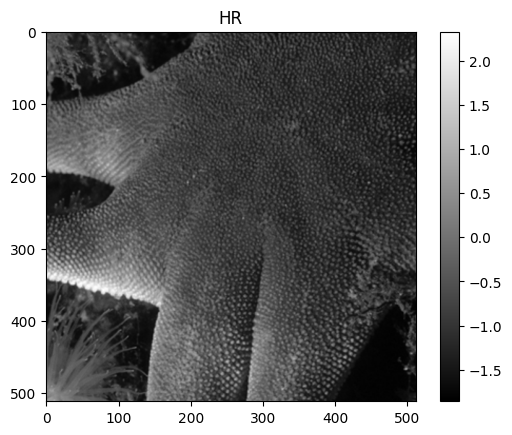

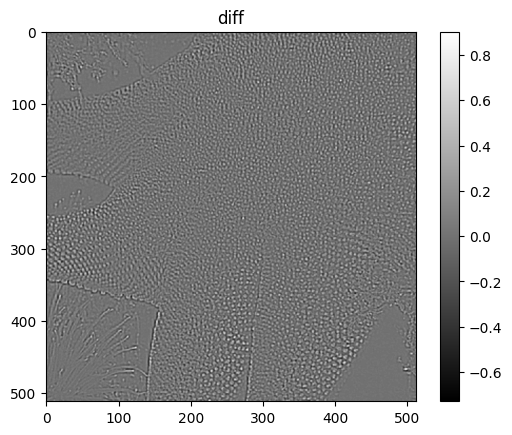

In [16]:
plt.title('LR')
plt.imshow(d[0][0][0][0], cmap='gray')
plt.colorbar()
plt.show()

plt.title('HR')
plt.imshow(d[1][0][0][0], cmap='gray')
plt.colorbar()
plt.show()

plt.title('diff')
plt.imshow(d[1][0][0][0] - d[0][0][0][0], cmap='gray')
plt.colorbar()
plt.show()

## Check dataloader DCT

In [17]:
d[0][1].shape

torch.Size([1, 1, 16, 16, 32, 32])

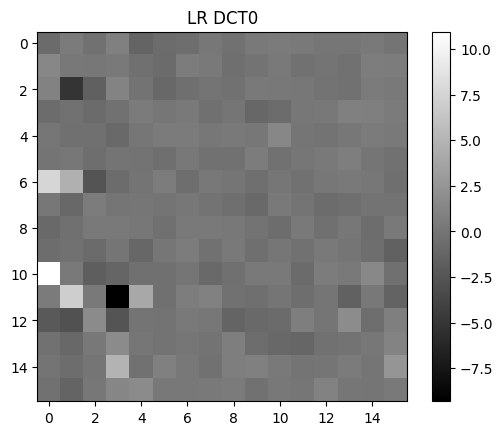

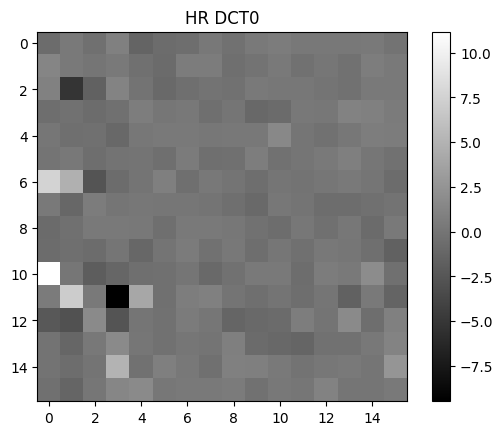

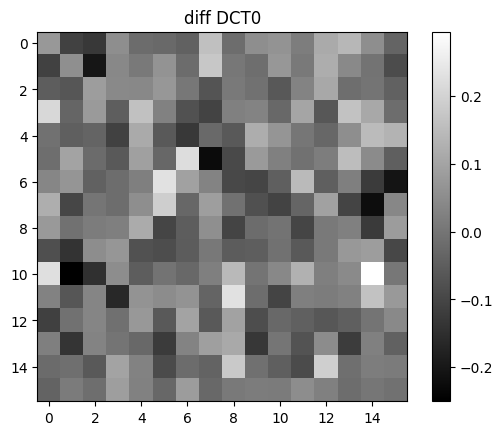

In [18]:
plt.title('LR DCT0')
plt.imshow(d[0][1][0, 0, :, :, 1, 0], cmap='gray')
plt.colorbar()
plt.show()

plt.title('HR DCT0')
plt.imshow(d[1][1][0, 0, :, :, 1, 0], cmap='gray')
plt.colorbar()
plt.show()

plt.title('diff DCT0')
plt.imshow(d[1][1][0, 0, :, :, 1, 0] - d[0][1][0, 0, :, :, 1, 0], cmap='gray')
plt.colorbar()
plt.show()

## Check dataloader WHT (Walsh–Hadamard Transform)

In [19]:
dl = DIV2KDataLoader(1, num_workers=0, shuffle=False, transform_type='wht')
d = next(iter(dl))
d[0][1].shape

torch.Size([1, 1, 16, 16, 32, 32])

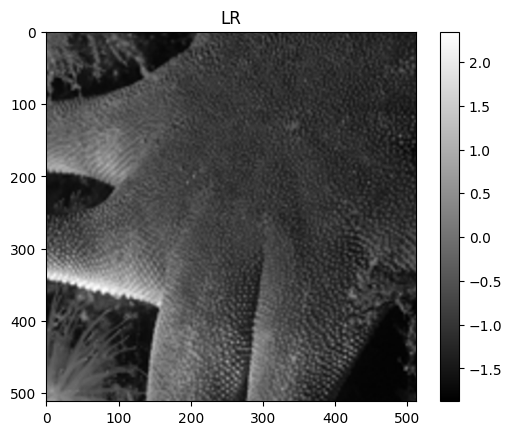

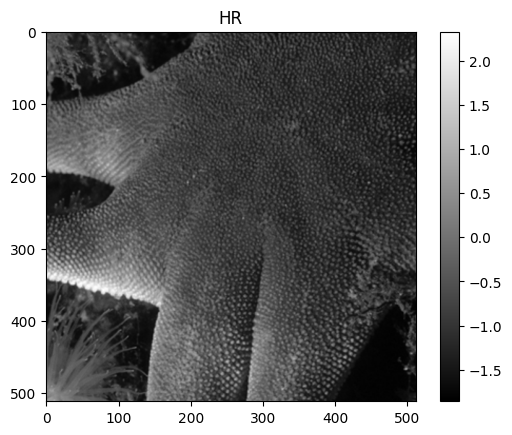

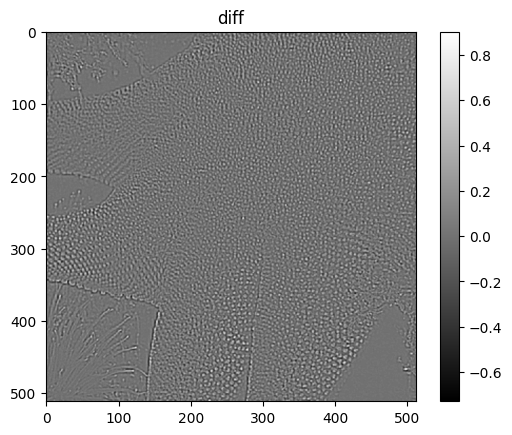

In [20]:
plt.title('LR')
plt.imshow(d[0][0][0][0], cmap='gray')
plt.colorbar()
plt.show()

plt.title('HR')
plt.imshow(d[1][0][0][0], cmap='gray')
plt.colorbar()
plt.show()

plt.title('diff')
plt.imshow(d[1][0][0][0] - d[0][0][0][0], cmap='gray')
plt.colorbar()
plt.show()

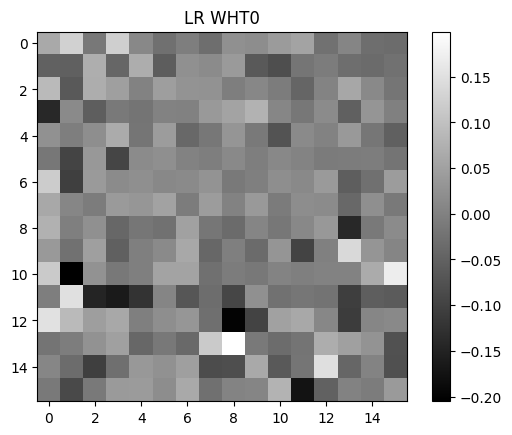

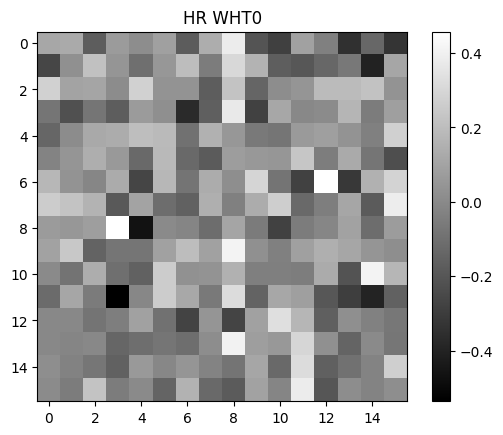

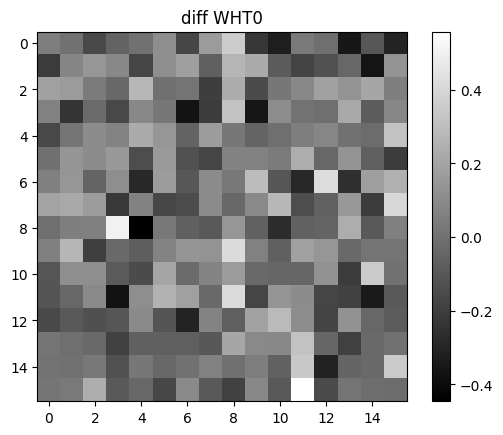

In [21]:
plt.title('LR WHT0')
plt.imshow(d[0][1][0, 0, :, :, 1, 0], cmap='gray')
plt.colorbar()
plt.show()

plt.title('HR WHT0')
plt.imshow(d[1][1][0, 0, :, :, 1, 0], cmap='gray')
plt.colorbar()
plt.show()

plt.title('diff WHT0')
plt.imshow(d[1][1][0, 0, :, :, 1, 0] - d[0][1][0, 0, :, :, 1, 0], cmap='gray')
plt.colorbar()
plt.show()